In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv(r"C:\Users\khush\OneDrive\Documents\laptop_data.csv")
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
dataset.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [4]:
dataset.describe()
dataset.shape

(1303, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
dataset.drop(columns= ['Unnamed: 0'],axis = 1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [7]:
dataset['Ram'] = dataset['Ram'].str.replace('GB','')
dataset['Weight'] = dataset['Weight'].str.replace('kg','')

In [8]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [9]:
dataset['Ram']= dataset['Ram'].astype('int32')
dataset['Weight']= dataset['Weight'].astype('float32')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(7)
memory usage: 112.1+ KB


C:\Users\khush\AppData\Local\Temp\ipykernel_3280\983781003.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Price'])
C:\Users\khush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

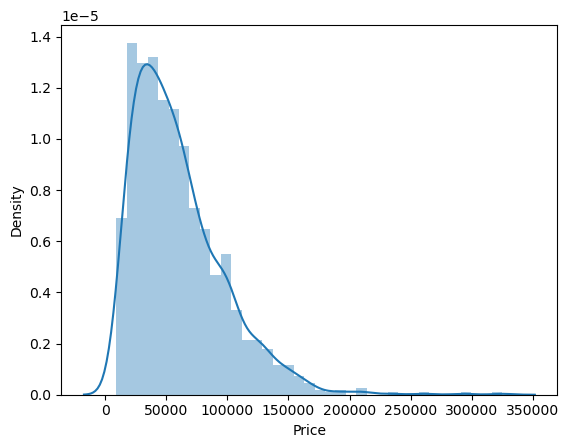

In [11]:
sns.distplot(dataset['Price'])

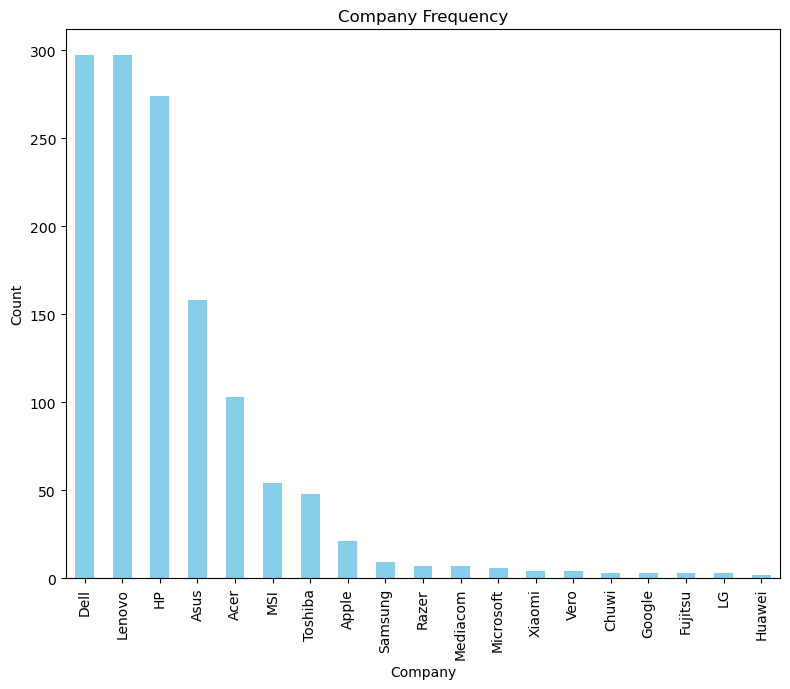

In [12]:

plt.figure(figsize=(8, 7))
dataset['Company'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Company Frequency')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation='vertical') 
plt.tight_layout()       
plt.show()

<Axes: xlabel='TypeName'>

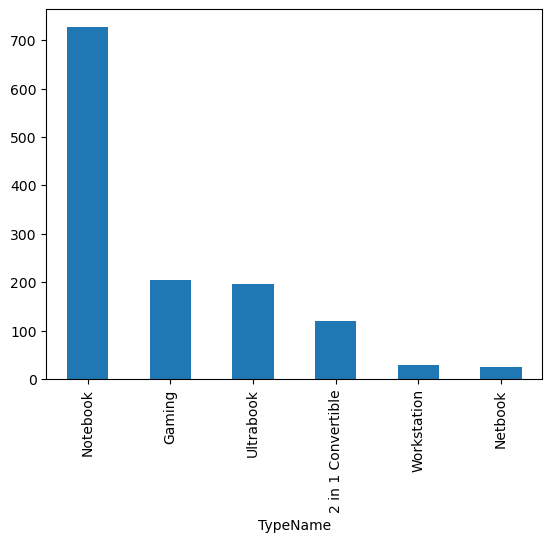

In [13]:
dataset['TypeName'].value_counts().plot(kind = 'bar')

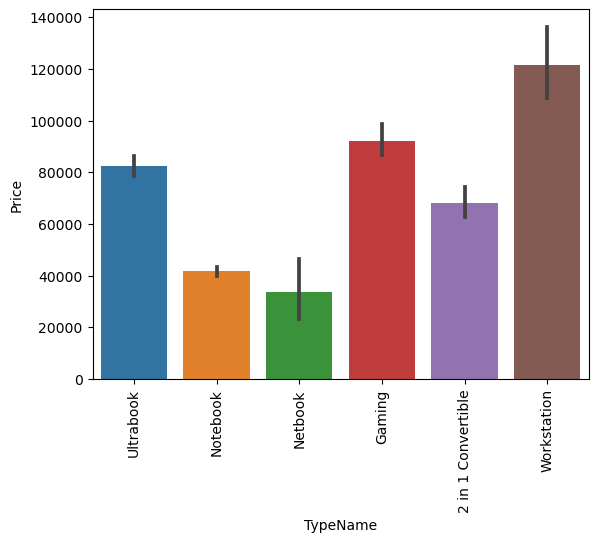

In [14]:
sns.barplot(x=dataset ['TypeName'], y=dataset ['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches'>

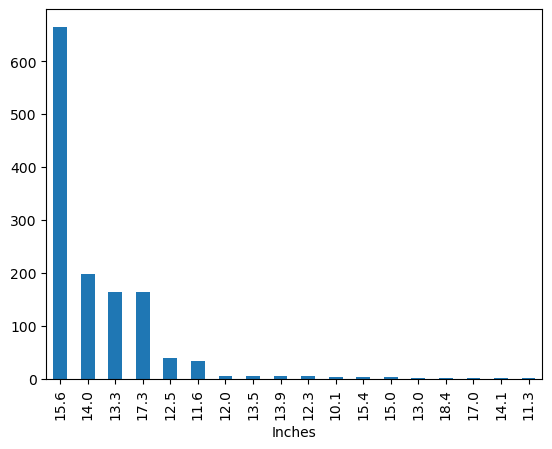

In [15]:
dataset['Inches'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Inches', ylabel='Price'>

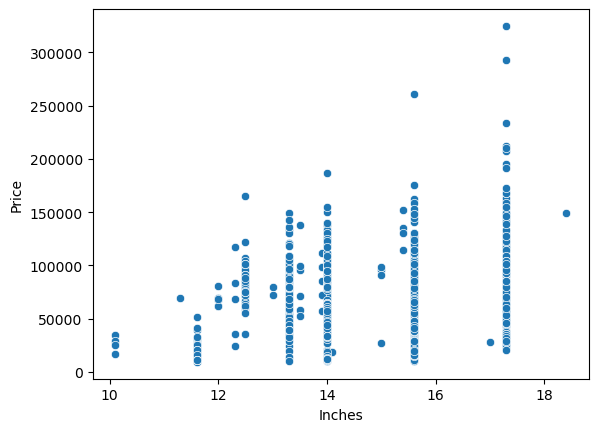

In [16]:
sns.scatterplot(x=dataset['Inches'],y=dataset['Price'])

In [17]:
 dataset['Touchscreen'] = dataset['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [18]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='Touchscreen'>

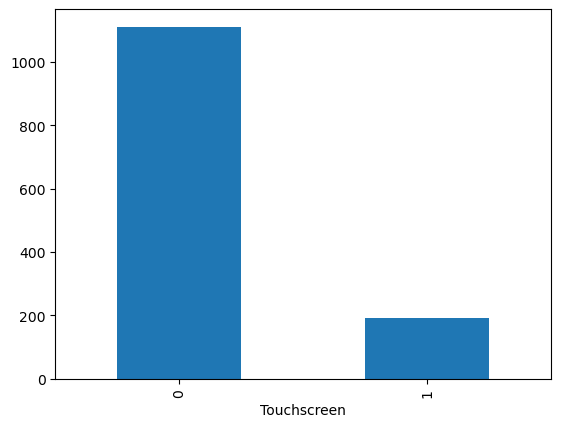

In [19]:
dataset['Touchscreen'].value_counts().plot(kind = 'bar')

In [20]:
 dataset['Ips'] = dataset['ScreenResolution'].apply(lambda x:1 if 'Ips' in x else 0)

In [21]:
dataset.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
660,660,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.56,65481.12,0,0
1285,1285,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,0
402,402,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD + 1TB HDD,AMD Radeon RX 550,Windows 10,2.10,60978.96,0,0
445,445,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64,62817.12,0,0
1076,1076,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,4,1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.30,52054.56,0,0
526,526,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.20,42570.72,0,0
1218,1218,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.60,67772.16,0,0
53,53,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,58767.84,0,0
197,197,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,51095.52,0,0
657,657,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.20,60472.80,0,0


In [22]:
 new = dataset['ScreenResolution'].str.split('x',n=1,expand = True)

In [23]:
dataset['X_Res'] = new[0]
dataset['Y_Res'] = new[1]

In [24]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_Res,Y_Res
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,IPS Panel Retina Display 2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,IPS Panel Retina Display 2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,IPS Panel Retina Display 2560,1600


In [25]:
dataset['X_Res'] = dataset['X_Res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [26]:
dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_Res,Y_Res
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,2560,1600


In [27]:
dataset['X_Res']= dataset['X_Res'].astype('int')
dataset['Y_Res']= dataset['Y_Res'].astype('int')

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  Ips               1303 non-null   int64  
 14  X_Res             1303 non-null   int32  
 15  Y_Res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64

In [29]:
dataset['ppi'] = ((dataset['X_Res']**2) + (dataset['Y_Res']**2))**0.5/dataset['Inches'].astype('float')

In [30]:
dataset.corr(numeric_only=True)['Price']


Unnamed: 0     0.067984
Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips                 NaN
X_Res          0.556529
Y_Res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [31]:
dataset.drop(columns = ['Inches','X_Res','Y_Res'],inplace = True)

In [32]:
dataset.drop(columns = ['ScreenResolution'],inplace = True)

In [33]:
dataset.head()

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983005
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534624
4,4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983005


In [34]:
dataset['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [35]:
dataset['Cpu Name'] = dataset['Cpu'].apply (lambda x:" ".join(x.split()[0:3]))

In [36]:
dataset.head()

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983005,Intel Core i5
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534624,Intel Core i7
4,4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983005,Intel Core i5


In [37]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'


In [38]:
dataset['Cpu brand'] = dataset['Cpu Name'].apply(fetch_processor)

In [39]:
dataset.head()

,Unnamed: 0,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983005,Intel Core i5,Intel Core i5
1,1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534624,Intel Core i7,Intel Core i7
4,4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

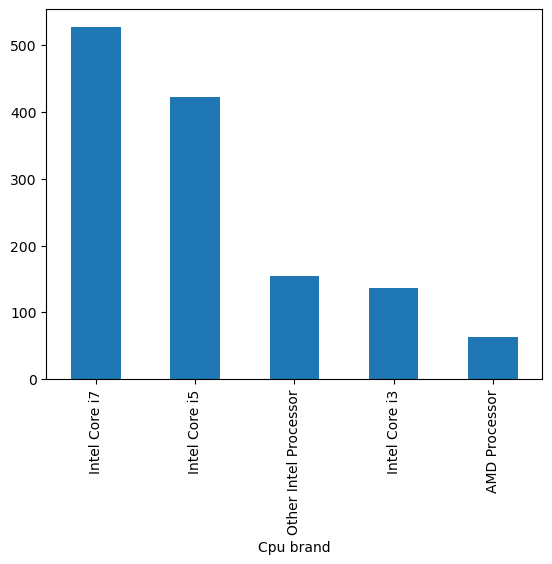

In [40]:
dataset['Cpu brand'].value_counts().plot(kind = 'bar')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

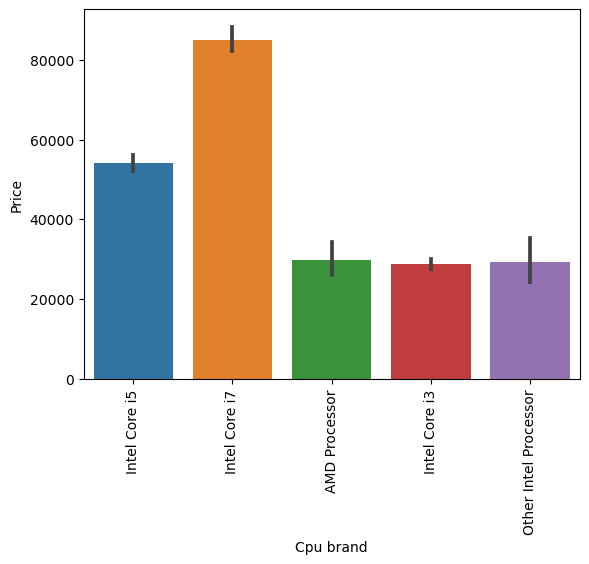

In [41]:
sns.barplot(x=dataset['Cpu brand'],y = dataset['Price'])
plt.xticks(rotation = 90)

In [42]:
dataset.drop(columns = ['Cpu','Cpu Name'],inplace = True)

In [43]:
dataset.head()

,Unnamed: 0,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983005,Intel Core i5
1,1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534624,Intel Core i7
4,4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

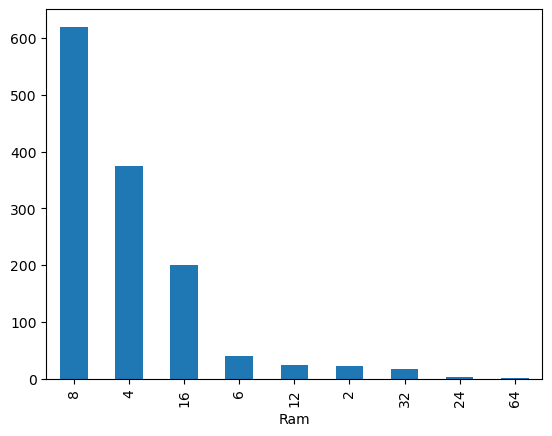

In [44]:
dataset['Ram'].value_counts().plot(kind  =  'bar')

In [45]:
# Convert 'Memory' to string and clean text
dataset['Memory'] = dataset['Memory'].astype(str).replace('\.0', '', regex=True)
dataset['Memory'] = dataset['Memory'].str.replace('GB', '', regex=False)
dataset['Memory'] = dataset['Memory'].str.replace('TB', '000', regex=False)



# Split memory column into two parts if '+' exists
new = dataset['Memory'].str.split("+", n=1, expand=True)



# Assign split parts to new columns
dataset["first"] = new[0].str.strip()
dataset["second"] = new[1].str.strip() if new.shape[1] > 1 else None



# Create Layer 1 storage type flags
dataset["Layer1HDD"] = dataset["first"].apply(lambda x: 1 if "HDD" in x else 0)
dataset["Layer1SSD"] = dataset["first"].apply(lambda x: 1 if "SSD" in x else 0)
dataset["Layer1Hybrid"] = dataset["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset["Layer1Flash_Storage"] = dataset["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)



# Remove non-digit characters from 'first'
dataset['first'] = dataset['first'].str.replace(r'\D', '', regex=True)



# Fill missing 'second' with empty string and process
dataset["second"] = dataset["second"].fillna("")
dataset["Layer2HDD"] = dataset["second"].apply(lambda x: 1 if "HDD" in x else 0)
dataset["Layer2SSD"] = dataset["second"].apply(lambda x: 1 if "SSD" in x else 0)
dataset["Layer2Hybrid"] = dataset["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
dataset["Layer2Flash_Storage"] = dataset["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)



# Remove non-digit characters from 'second'
dataset['second'] = dataset['second'].str.replace(r'\D', '', regex=True)



# Convert to integers (handling empty strings safely)
dataset["first"] = dataset["first"].replace('', '0').astype(int)
dataset["second"] = dataset["second"].replace('', '0').astype(int)



# Calculate actual storage
dataset["HDD"] = (dataset["first"] * dataset["Layer1HDD"] + dataset["second"] * dataset["Layer2HDD"])
dataset["SSD"] = (dataset["first"] * dataset["Layer1SSD"] + dataset["second"] * dataset["Layer2SSD"])
dataset["Hybrid"] = (dataset["first"] * dataset["Layer1Hybrid"] + dataset["second"] * dataset["Layer2Hybrid"])
dataset["Flash_Storage"] = (dataset["first"] * dataset["Layer1Flash_Storage"] + dataset["second"] * dataset["Layer2Flash_Storage"])



# Drop intermediate columns
dataset.drop(columns=[
    'first', 'second', 
    'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
    'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
], inplace=True)


In [46]:
dataset.sample(5)

,Unnamed: 0,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
926,926,Lenovo,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.36,87912.0000,0,0,176.232574,Intel Core i7,0,256,0,0
490,490,Lenovo,Notebook,8,256 SSD,Nvidia GeForce 940MX,Windows 10,2.30,53918.8272,0,0,141.211998,Intel Core i5,0,256,0,0
375,375,HP,Notebook,4,256 SSD,AMD Radeon R5,Windows 10,1.91,26053.3872,0,0,141.211998,AMD Processor,0,256,0,0
818,818,Dell,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,4.36,133467.4656,0,0,127.335675,Intel Core i7,1000,128,0,0
61,61,Dell,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.70,46833.1200,0,0,157.350512,Intel Core i5,0,256,0,0


In [47]:
dataset.drop(columns = ['Memory'],inplace = True)

In [48]:
dataset.head()

,Unnamed: 0,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983005,Intel Core i5,0,128,0,0
1,1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534624,Intel Core i7,0,512,0,0
4,4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983005,Intel Core i5,0,256,0,0


In [49]:
dataset.corr(numeric_only=True)['Price']

Unnamed: 0       0.067984
Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips                   NaN
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [50]:
dataset.drop(columns = ['Hybrid','Flash_Storage'],inplace = True)

In [51]:
dataset.head()

,Unnamed: 0,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983005,Intel Core i5,0,128
1,1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534624,Intel Core i7,0,512
4,4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983005,Intel Core i5,0,256


In [52]:
dataset['Gpu brand'] = dataset['Gpu'].apply(lambda x:x.split()[0])

In [53]:
dataset.head()

,Unnamed: 0,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,0,226.983005,Intel Core i5,0,128,Intel
1,1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,0,220.534624,Intel Core i7,0,512,AMD
4,4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,0,226.983005,Intel Core i5,0,256,Intel


In [54]:
dataset = dataset [dataset['Gpu brand'] != 'ARM']

In [55]:
dataset ['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [56]:
dataset.drop(columns=['Gpu'], inplace=True)

In [57]:
dataset.head()

,Unnamed: 0,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,0,226.983005,Intel Core i5,0,128,Intel
1,1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,0,220.534624,Intel Core i7,0,512,AMD
4,4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,0,226.983005,Intel Core i5,0,256,Intel


In [58]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [59]:
dataset['os'] = dataset['OpSys'].apply(cat_os)

In [60]:
dataset.head()

,Unnamed: 0,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,0,226.983005,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,0,220.534624,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,0,226.983005,Intel Core i5,0,256,Intel,Mac


In [61]:
dataset.drop(columns = ['OpSys'],inplace = True)

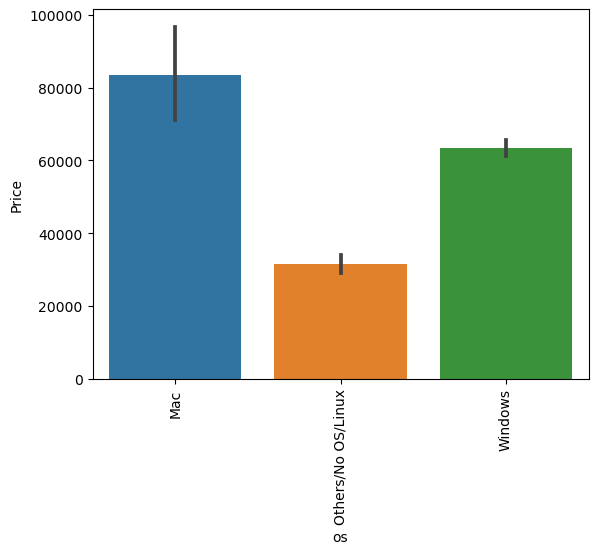

In [62]:
sns.barplot(x=dataset['os'],y=dataset['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\khush\AppData\Local\Temp\ipykernel_3280\1607304647.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Weight'] )
C:\Users\khush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Density'>

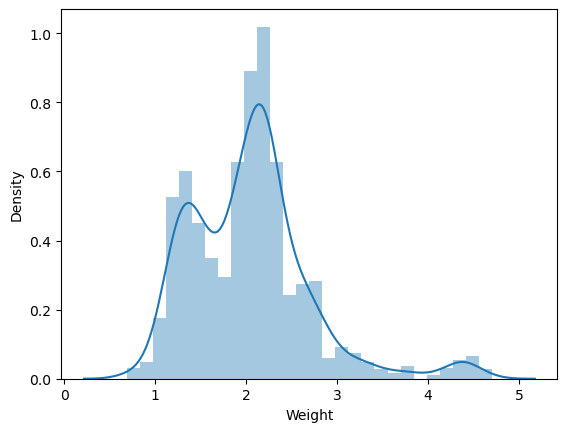

In [63]:
sns.distplot(dataset['Weight'] )

<Axes: >

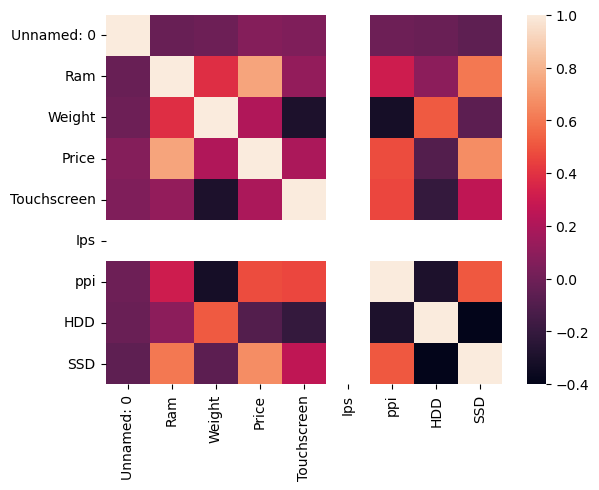

In [64]:
sns.heatmap(dataset.select_dtypes(include=[np.number]).corr())

In [65]:
dataset['Ips'].value_counts(dropna=False)


Ips
0    1302
Name: count, dtype: int64

In [66]:
print(dataset['Ips'].value_counts(dropna=False))


Ips
0    1302
Name: count, dtype: int64


In [67]:
dataset.drop(columns='Ips', inplace=True)

In [68]:
dataset.corr(numeric_only=True)['Price']

Unnamed: 0     0.068784
Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

C:\Users\khush\AppData\Local\Temp\ipykernel_3280\823471553.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(dataset['Price']))
C:\Users\khush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

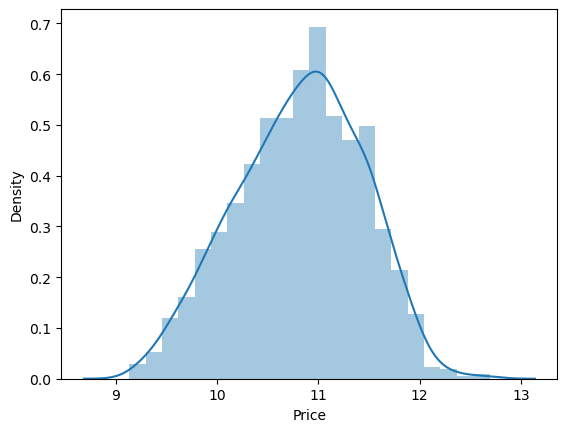

In [69]:
sns.distplot(np.log(dataset['Price']))

In [70]:
dataset.drop(columns = ['Unnamed: 0'],inplace = True)

In [71]:
X = dataset.drop(columns = ['Price'])
y = np.log(dataset['Price'])

In [72]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [73]:
X 

,Company,TypeName,Ram,Weight,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [75]:
dataset.head(1)

,Company,TypeName,Ram,Weight,Price,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,226.983005,Intel Core i5,0,128,Intel,Mac


In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    ExtraTreesRegressor
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer

# LINEAR REGRESSION


In [77]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 6, 9, 10])
], remainder='passthrough')


step2 = LinearRegression()


pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred)*100)
print("MAE:", mean_absolute_error(y_test, y_pred)*100)

R2 Score: 80.74868005970501
MAE: 21.019992624210214


C:\Users\khush\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
np.exp(0.21)

1.2336780599567432

# Ridge REGRESSION


In [79]:

# Step 1: Define ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 6, 9, 10])  # Adjust indices if needed
], remainder='passthrough')

# Step 2: Define the regression model (Ridge)
step2 = Ridge(alpha=10)

# Create a pipeline combining both steps
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Print the results
print('R2 score:', r2_score(y_test, y_pred)*100)
print('MAE:', mean_absolute_error(y_test, y_pred)*100)

R2 score: 81.29624393609238
MAE: 20.905390965281033


C:\Users\khush\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# KNN 

In [80]:

# Step 1: Define ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 6,9,10])  # Adjust indices if needed
], remainder='passthrough')

# Step 2: Define the KNeighbors Regressor model
step2 = KNeighborsRegressor(n_neighbors=2)

# Create a pipeline combining both steps
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the test data
y_pred = pipe.predict(X_test)

# Print the results
print('R2 score:', r2_score(y_test, y_pred)*100)
print('MAE:', mean_absolute_error(y_test, y_pred)*100)

R2 score: 80.5213928302559
MAE: 20.25046025786523


C:\Users\khush\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# DECISION TREE

In [81]:
# Step 1: ColumnTransformer to encode categorical features
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 6, 9, 10])  # ensure these indices are correct
], remainder='passthrough')

# Step 2: DecisionTreeRegressor model with max depth of 8
step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred)*100)
print('MAE:', mean_absolute_error(y_test, y_pred)*100)

R2 score: 85.4885330543803
MAE: 17.637838509288624


C:\Users\khush\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# SVM

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 6, 9, 10])
], remainder='passthrough')

step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipe.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred)*100)
print('MAE:', mean_absolute_error(y_test, y_pred)*100)


C:\Users\khush\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 80.69085779039081
MAE: 20.305232181348583


# RANDOM FOREST

In [83]:
# Define the preprocessing step
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 6, 9, 10])
], remainder='passthrough')

# Define the model with the best parameters found
step2 = RandomForestRegressor(
    n_estimators=300,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=1,
    max_samples=0.9,
    max_features=0.8,
    random_state=2
)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the model
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Calculate and print metrics
print('R2 score:', r2_score(y_test, y_pred)*100)
print('MAE:', mean_absolute_error(y_test, y_pred)*100)

C:\Users\khush\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 88.59205463685048
MAE: 15.940974564996854


# GRADIENT BOOST

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 6, 9, 10])
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred)*100)
print('MAE:', mean_absolute_error(y_test, y_pred)*100)

C:\Users\khush\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 88.33590831146203
MAE: 16.03544935956594


# Exporting Model

In [87]:
import pickle
import os

# Check current working directory
print("Current working directory:", os.getcwd())

# Save the dataset
with open('dataset.pkl', 'wb') as file:
    pickle.dump(dataset, file)

# Save the pipeline
with open('pipe.pkl', 'wb') as file:
    pickle.dump(pipe, file)

# Verify the files were created
if os.path.exists('dataset.pkl') and os.path.exists('pipe.pkl'):
    print("Files successfully created!")
    print(f"dataset.pkl size: {os.path.getsize('dataset.pkl')} bytes")
    print(f"pipe.pkl size: {os.path.getsize('pipe.pkl')} bytes")
else:
    print("Failed to create files. Check permissions and path.")

Current working directory: C:\Users\khush
Files successfully created!
dataset.pkl size: 114551 bytes
pipe.pkl size: 584760 bytes


In [88]:
dataset

,Company,TypeName,Ram,Weight,Price,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,100.454670,Intel Core i7,1000,0,AMD,Windows
